# Section 3.1 — Estimators

This notebook contains the code examples from [Section 3.1 Estimators]() of the **No Bullshit Guide to Statistics**.

We'll begin our study of inferential statistics by introducing **estimators**,
which are the math tools used for both **estimation**  and **hypothesis testing**.

![simplified_estimators.png](../stats_overview/figures/simplified_estimators.png)

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Plot helper functions
from plot_helpers import plot_pdf
from plot_helpers import savefigure

In [3]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (8,4)},
    # rc={'figure.figsize': (5,2)},
)
blue, orange  = sns.color_palette()[0], sns.color_palette()[1]

DESTDIR = "figures/stats/estimators"

%config InlineBackend.figure_format = 'retina'

In [4]:
# set random seed for repeatability
np.random.seed(42)

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$
$\newcommand{\DMeans}{\textbf{DMeans}}$
$\newcommand{\Prop}{\textbf{Prop}}$
$\newcommand{\DProps}{\textbf{DProps}}$


(this cell contains the macro definitions $\stderr{}$, $\stderrhat{}$, $\Mean$, ...)

## Statistical inference context

DATA:
- population
- sample
- statistic

PROB:
- probability model
- model family
- parameters


Statistical inference is the use the values of the statistics obtained from the sample $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ to estimate the population parameters $\theta$. For example,
the sample mean $\overline{\mathbf{x}}=\Mean(\mathbf{x})$ is an estimate of the population mean $\mu$,
and the sample variance $s_{\mathbf{x}}^2=\Var(\mathbf{x})$ is an estimate of the population variance $\sigma^2$.

## Estimator definitions

- We use the term "estimator" to describe a function $g$ that takes samples as inputs
  and produces parameter estimates as outputs.
  Written mathematically, and estimator is a function of the form:
  $$
   g \colon \underbrace{\mathcal{X}\times \mathcal{X}\times \cdots \times \mathcal{X}}_{n \textrm{ copies}}
   \quad \to \quad \mathbb{R},
  $$
  where $n$ is the samples size and $\mathcal{X}$ denotes the possible values of the random variable $X$.
- We give different names to estimates, depending on the use case:
  - **statistic** = a quantity computed from a sample (e.g. descriptive statistics)
  - **parameter estimates** = statistics that estimate population parameters
  - **test statistic** = an estimate used as part of hypothesis testing procedure
- The **value** of the estimator $\hat{\theta} = g(\mathbf{x})$ is computed from a particular sample
  $\mathbf{x} = (x_1, x_2, \ldots, x_n)$.
- The **sampling distribution** of the estimator $g$ is the distribution of $\hat{\Theta} = g(\mathbf{X})$,
  where $\mathbf{X} = (X_1, X_2, \ldots, X_n)$ is a *random sample*.

#### Sample mean

  - estimator: $\overline{\mathbf{x}} = \Mean(\mathbf{x}) = \frac{1}{n}\sum_{i=1}^n x_i$
  - gives an estimate for the population mean $\mu$

In [5]:
def mean(sample):
    return sum(sample) / len(sample)

# ALT. use np.mean(sample)
# ALT. use .mean() method on a Pandas series

#### Sample variance

  - estimator: $s_{\mathbf{x}}^2 = \Var(\mathbf{x}) = \frac{1}{n-1}\sum_{i=1}^n (x_i-\overline{\mathbf{x}})^2$
  - gives an estimate for the population variance $\sigma^2$
  - note the denominator is $(n-1)$ and not $n$ 

In [6]:
def var(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / (len(sample)-1)

# ALT. use np.var(sample, ddof=1)
# ALT. use .var() method on a Pandas series

#### Example 1: kombucha volume mean and variance


In [7]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
# kombucha

In [8]:
batch01 = kombucha[kombucha["batch"]==1]
ksample01 = batch01["volume"].values
ksample01

array([1016.24,  993.88,  994.72,  989.27, 1008.65,  976.98, 1017.45,
        992.39, 1003.19,  997.51, 1014.62,  979.4 ,  996.78,  996.16,
       1011.34,  989.  ,  998.28,  991.22, 1000.42, 1005.83,  988.99,
       1011.45, 1009.02, 1005.02, 1009.01,  993.16,  998.77,  990.64,
        997.32, 1005.3 ,  993.08,  996.03,  993.13,  991.55,  993.29,
        999.87,  988.83, 1002.34, 1016.6 , 1007.42])

In [9]:
mean(ksample01)

999.10375

In [10]:
var(ksample01)

95.43654198717958

In [11]:
np.sqrt(var(ksample01))

9.769162808919686

#### Example 2: apple weight mean and variance


In [12]:
apples = pd.read_csv("../datasets/apples.csv")
# apples

In [13]:
xA = apples["weight"].values

Next we calculate the mean of the prices in the West end:

In [14]:
mean(xA)

153.43474999999995

Let's also calculate the variance of the apple weights:

In [15]:
var(xA)

379.524625576923

In [16]:
np.sqrt(var(xA))

19.48139177720429

In this notebook we'll develop some new estimators that are specific for the comparison of the two groups.

#### Difference between sample means
  - estimator: $\hat{d} = \DMeans(\mathbf{x}_A, \mathbf{x}_B) = \Mean(\mathbf{x}_A) - \Mean(\mathbf{x}_B) = \overline{\mathbf{x}}_A - \overline{\mathbf{x}}_B$
  - gives an estimate for the difference between population means: $\Delta =  \mu_A - \mu_B$

In [17]:
def dmeans(xsample, ysample):
    """
    Compute the difference between group means of the samples.
    """
    dhat = mean(xsample) - mean(ysample)
    return dhat

#### Example 3: electricity prices means, variances, and difference between means


In [18]:
eprices = pd.read_csv("../datasets/eprices.csv")
# eprices

In [19]:
xW = eprices["West"]
xW.values

array([11.8, 10. , 11. ,  8.6,  8.3,  9.4,  8. ,  6.8,  8.5])

In [20]:
xE = eprices["East"]
xE.values

array([7.7, 5.9, 7. , 4.8, 6.3, 6.3, 5.5, 5.4, 6.5])

Next we calculate the mean of the prices in the West end:

In [21]:
mean(xW)

9.155555555555555

Let's also calculate the variance of the electricity prices in the West end:

In [22]:
var(xW)

2.440277777777778

Similarly, we can calculate the mean and the variance of the electricity prices in the East end.

In [23]:
mean(xE), var(xE)

(6.155555555555555, 0.7702777777777777)

Finally,
we compute the estimate $\hat{d} = \textrm{DMeans}(\tt{xW}, \tt{xE})$.

In [24]:
dmeans(xW, xE)

3.0

According to this estimate,
the average price Rob can expect in the East end is three cents cheaper,
on average,
as compared to the average electricity price in the West.


## Sampling distributions


TODO import definitions


### Examples of sampling distributions

Let's look at the same estimators that we described in the previous section,
but this time applied to *random* samples of size $n$:

- Sample mean: $\overline{\mathbf{X}} = \Mean(\mathbf{X}) = \tfrac{1}{n}\sum_{i=1}^n X_i$
- Sample variance: $S_{\mathbf{X}}^2 = \Var(\mathbf{X}) = \tfrac{1}{n-1}\sum_{i=1}^n \left(X_i - \overline{\mathbf{X}} \right)^2$
- Difference between sample means: $\hat{D} = \DMeans(\mathbf{X}, \mathbf{Y}) = \overline{\mathbf{X}} - \overline{\mathbf{Y}}$ 

Note these formulas is identical to the formulas we saw earlier.
The only difference is that we're calculating the functions $g$, $h$, and $d$ based on a random sample $\mathbf{X} = (X_1, X_2, \ldots, X_n)$,
instead of particular sample $\mathbf{x} = (x_1, x_2, \ldots, x_n)$.

### Visualizing sampling distributions



In [25]:
def gen_sampling_dist(rv, statfunc, n, N=10000):
    stats = []
    for i in range(0, N):
        sample = rv.rvs(n)
        stat = statfunc(sample)
        stats.append(stat)
    return stats

#### Example 1 (cont): sampling distribution of the mean kombucha volume

The probability distribution of the kombucha volume is know to
be $K \sim \mathcal{N}(\mu_K=1000, \sigma_K=10)$.


This is an usual case where we know the population parameters,
but we'll investigate because it allows us to learn more about sampling distributions.

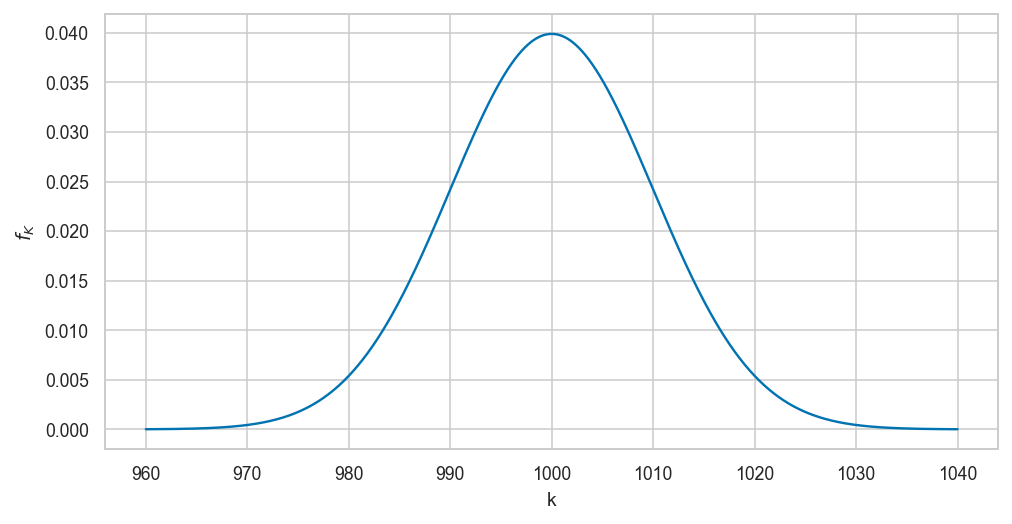

In [26]:
from scipy.stats import norm
muK = 1000
sigmaK = 10
rvK = norm(muK, sigmaK)

ax = plot_pdf(rvK, xlims=[960,1040], rv_name="K")

In [27]:
# # NOT USED (decided no need to show pdf in the book)
# filename = os.path.join(DESTDIR, "plot_pdf_normal_mu1000_sigma10.pdf")
# savefigure(ax, filename)

##### Sampling distribution of the sample mean

In [28]:
np.random.seed(43)
nbars = gen_sampling_dist(rvN, statfunc=mean, n=20)
ax = sns.histplot(nbars, stat="density", bins=100)
_ = ax.set_xlabel("$\overline{\mathbf{n}}$")

NameError: name 'rvN' is not defined

In [ ]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_n20_normal_mu1000_sigma100.pdf")
savefigure(ax, filename)

In [ ]:
# expected  observed
mu,         np.mean(nbars)

In [ ]:
# expected     observed
sigma**2/20,   np.var(nbars, ddof=1)

##### Sampling distribution of the sample variance

In [ ]:
np.random.seed(44)
nvars = gen_sampling_dist(rvN, statfunc=var, n=20)
ax = sns.histplot(nvars, stat="density", bins=100)
_ = ax.set_xlabel("$s^2_{\mathbf{n}}$")

In [ ]:
filename = os.path.join(DESTDIR, "sampling_dist_var_n20_normal_mu1000_sigma100.pdf")
savefigure(ax, filename)

In [ ]:
# expected   observed
sigma**2,    np.mean(nvars)

##### Sampling distribution of sample median (optional)

In [ ]:
np.random.seed(44)
nmedians = gen_sampling_dist(rvN, statfunc=np.median, n=20)
ax = sns.histplot(nmedians, stat="density", bins=100)
_ = ax.set_xlabel("Median(${\mathbf{n}}$)")

##### Sampling distribution of 90th percentile (optional)

In [ ]:
def ninetypctile(sample):
    return np.percentile(sample, 90)
ninetypctiles = gen_sampling_dist(rvN, statfunc=ninetypctile, n=20)
ax = sns.histplot(ninetypctiles, stat="density", bins=100)
_ = ax.set_xlabel("90$^\mathrm{th}$ percentile of ${\mathbf{n}}$")

##### Ground truth for estimates

Let's generate a particular sample to use in examples.

In [ ]:
np.random.seed(47)
nsample20 = rvN.rvs(20)
nsample20

In [ ]:
# [round(n,2) for n in nsample20]

In [ ]:
mean(nsample20)

In [ ]:
var(nsample20)

##### Ground truth for sampling distributions

The sampling distribution graphs we saw above represent the true sampling distributions
for the estimators $\Mean$, $\Var$, etc.,
generated from samples of size $n=20$ from the population
$K \sim \mathcal{N}(\mu_K=1000, \sigma_K=10)$.

We can therefore use them as the "ground truth" for the approximations techniques
we'll learn about in the next two subsections.

### Estimator properties

- **bias**
- **variance**
  The square root of the variance of an estimator is called the **standard error**.


![bias and variance](attachments/stats/estimators/bias_and_variance_targets.png)

## Analytical approximation formulas

Use probability theory formulas to come up with approximation formulas for certain sampling distributions.

### Sample mean estimator

The central limit theorem tells us everything we need to know about the sampling distribution of the sample mean estimator $\Mean$,
which corresponds to the random variable $\overline{\mathbf{X}} = \Mean(\mathbf{X})$.

The central limit theorem states that the sampling distribution of the mean 
converges to a normal distribution as $n$ goes to infinity:
$$
    \overline{\mathbf{X}}
    \quad \sim \quad
    \mathcal{N}\big(\mu_X, \tfrac{\sigma_X}{\sqrt{n}} \big).
$$
Note the central limit theorem gives a sampling distribution of the sample mean
computed from samples taken from **any** population $X \sim \mathcal{M}(\theta)$.

#### Verification of the CLT

The true sampling distribution of the sample mean generated using simulation
from thousands of samples of size $n=20$.

In [ ]:
n = 20
nbars = gen_sampling_dist(rvN, statfunc=mean, n=n)
ax = sns.histplot(nbars, stat="density", bins=100)
_ = ax.set_xlabel("$\overline{\mathbf{n}}$")

Let's now superimpose a lineplot of the analytical approximation formula
we obtain from the central limit theorem.

In [ ]:
# mean equal to the population mean
meanNbar = rvN.mean()

# standard error
seNbar = rvN.std() / np.sqrt(n)

# sampling distribution of the mean
rvNbar = norm(meanNbar, seNbar)

# plot pdf superimposed
plot_pdf(rvNbar, ax=ax)
ax.figure

In [ ]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_exp_and_theory_n20_normal_mu1000_sigma100.pdf")
savefigure(ax, filename)

#### Analysis for sample of size $n=7$

##### True sampling distribution of the sample mean
We start by running a simulation to obtain the true sampling distribution of the sample mean
for samples of size $n=7$ from the population $N \sim \mathcal{N}(1000,100)$.

In [ ]:
np.random.seed(48)
nbars7 = gen_sampling_dist(rvN, statfunc=mean, n=7, N=50000)
ax = sns.histplot(nbars7, stat="density", bins=100, color="m")

##### A particular sample of size $n=7$

Next we generate a particular sample of size $n=7$,
which is analogous to the operation of a statistical analysis in the real world,
when we don't know the variance of the distribution.

In [ ]:
np.random.seed(52)
nsample7 = rvN.rvs(7)
nsample7

In [ ]:
mean(nsample7)

In [ ]:
nvar7 = var(nsample7)
nstd7 = np.sqrt(nvar7)
nstd7

In [ ]:
# the true population standard deviation
sigma

##### Normal approximation to the sampling distribution

We now obtain the best normal approximation based on the estimated standard error `sehat`
that we computed from the data in `nsample7`.

In [ ]:
nstd7 = np.sqrt(var(nsample7))
sehat = nstd7 / np.sqrt(7)

rvY = norm(loc=rvN.mean(), scale=sehat)

plot_pdf(rvY, ax=ax)
_ = ax.set_xlabel("$\overline{\mathbf{n}}$")
ax.figure

In [ ]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_rvN_and_N_approx_from_nsample7.pdf")
savefigure(ax, filename)

#### A better reference distribution

Obtain Student's $t$-distribution based on the estimated standard error `sehat`
that we computed from the data in `nsample7`.

In [ ]:
from scipy.stats import t as tdist

nstd7 = np.sqrt(var(nsample7))
sehat = nstd7 / np.sqrt(7)
df = 7 - 1  # (n-1) degrees of freedom
# alt. rvTkbar
rvT = tdist(df, loc=rvN.mean(), scale=sehat)
plot_pdf(rvT, ax=ax, xlims=[800,1200])
_ = ax.set_xlabel("$\overline{\mathbf{n}}$")
ax.figure

In [ ]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_rvN_and_T_approx_from_nsample7.pdf")
savefigure(ax, filename)

### Sample variance estimator

When the population is normally distributed $X \sim \mathcal{N}(\mu,\sigma)$,
the sampling distribution of the sample variance $S_{\mathbf{x}}^2$
is described by a scaled version of the chi-square distribution:
$$
    S_{\mathbf{x}}^2
    \;\; \sim \;\;
    \underbrace{\frac{ \sigma^2 }{ (n-1) } }_{\tt{scale}} \; \cdot \; \chi^2_{(n-1)}
$$
where $n$ is the sample size and $\chi^2_{(n-1)}$ is the chi-square distribution with $n-1$ degrees of freedom.

#### Sampling distribution of the variance

Let's start by plotting a histogram of the sampling distribution of the variance
computed from samples of size $n=20$ from the random variable `rvN` = $N \sim \mathcal{N}(\mu_N,\sigma_N)$.

In [ ]:
np.random.seed(44)
nvars = gen_sampling_dist(rvN, statfunc=var, n=20)
ax = sns.histplot(nvars, stat="density", bins=100)

Let's now superimpose the chi-square distribution with $20-1=19$ degrees of freedom,
with scale parameter set to $\sigma_N^2/(n-1)$.

In [ ]:
from scipy.stats import chi2
df = 20 - 1
sigma = rvN.std()
scale = sigma**2/(20-1)
rvS2 = chi2(df, loc=0, scale=scale)
plot_pdf(rvS2, ax=ax)
_ = ax.set_xlabel("$s^2_{\mathbf{n}}$")
ax.figure

In [ ]:
filename = os.path.join(DESTDIR, "sampling_dist_var_rvN_and_X2_approx_from_nsample20.pdf")
savefigure(ax, filename)

### Difference between means estimator


Consider two normally distributed random variables $X$ and $Y$:
$$ 
X \sim \mathcal{N}\!\left(\mu_X, \sigma_X \right)
\qquad
\textrm{and}
\qquad
Y \sim \mathcal{N}\!\left(\mu_Y, \sigma_Y \right)
$$
that describe the probability distribution for two groups.

- A sample of size $n$ from $X$ is denoted $\mathbf{x} = (x_1, x_2, \ldots, x_{n})$=`xsample`,
  and let $\mathbf{y} = (y_1, y_2, \ldots, y_{m})$=`ysample` be a random sample of size $m$ from $Y$.
- We can compute the mean in each group: $\overline{\mathbf{x}} = \Mean(\mathbf{x})$
  and $\overline{\mathbf{y}} = \Mean(\mathbf{y})$
- We can also compute the sample variance from each group:
   $s_{\mathbf{x}}^2 = \Var(\mathbf{x})$
   and $s_{\mathbf{y}}^2 = \Var(\mathbf{y})$.
- The value of the difference between means estimator is $\hat{d} = \DMeans(\mathbf{x}, \mathbf{y}) = \overline{\mathbf{x}} - \overline{\mathbf{y}}$.
  The value $\hat{d}$ is an estimate of the true different between
  population means $\Delta = \mu_X - \mu_Y$.


#### Sampling distribution of the estimator `dmeans`

Consider now the random samples $\mathbf{X} = (X_1, X_2, \ldots, X_{n})$
and $\mathbf{Y} = (Y_1, Y_2, \ldots, Y_{m})$.
The **sampling distribution** of the different between means estimator
is defined as
$$
  \hat{D} = \overline{\mathbf{X}} - \overline{\mathbf{Y}}.
$$

By definition, the sampling distribution of the estimator is obtained by repeatedly generating samples `xsample` and `ysample` from the two distributions and computing `dmeans` on the random samples. For example, we can obtain the sampling distribution by generating $N=1000$ samples.

#### Theoretical model for the sampling distribution

Let's now use probability theory to build a theoretical model for the sampling distribution of the difference-between-means estimator `dmeans`.

- The central limit theorem tells us the sample mean within the two group are
  $$
  \overline{\mathbf{X}} \sim \mathcal{N}\!\left(\mu_X, \tfrac{\sigma_X}{\sqrt{n}} \right)
  \qquad \textrm{and} \qquad
  \overline{\mathbf{Y}} \sim \mathcal{N}\!\left(\mu_Y, \tfrac{\sigma_Y}{\sqrt{m}} \right).
  $$

- The rules of probability theory tells us that the [difference of two normal random variables](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables#Independent_random_variables) requires subtracting their means and adding their variance, so we get:
  $$
  \hat{D}
    \sim
    \mathcal{N}\!\left(
        \mu_X - \mu_Y, \;
        \sqrt{\tfrac{\sigma^2_X}{n} + \tfrac{\sigma^2_Y}{m}}
    \right).
  $$

In other words, the sampling distribution for the difference between means estimator $\hat{D}$ has mean and standard error given by:
$$ 
   \mu_{\hat{d}} = \mu_X - \mu_Y
   \qquad \textrm{and} \qquad
   \stderr{\hat{d}} = \sqrt{ \tfrac{\sigma^2_X}{n} + \tfrac{\sigma^2_Y}{m}  }.
$$

#### Example 1 (continued): difference between electricity prices

Probability theory predicts the sampling distribution had mean ...

In [ ]:
eprices = pd.read_csv("../datasets/eprices.csv")

xW = eprices["West"]
nW = xW.count()
stdW = xW.std()

xE = eprices["East"]
nE = xE.count()
stdE = xE.std()

In [ ]:
seD = np.sqrt(stdW**2/nW + stdE**2/nE)
seD

The degrees of freedom of is obtained by the following formula
$$
\nu_{\hat{d}}
    \;\; = \;\;
    \frac{ (\stderrhat{\overline{\mathbf{x}}}^2 + \stderrhat{\overline{\mathbf{y}}}^2)^2 }
        { \frac{\stderrhat{\overline{\mathbf{x}}}^4}{n-1} + \frac{\stderrhat{\overline{\mathbf{y}}}^4}{m-1}	}\;.
$$

Calculate the degrees of freedom parameter.

In [ ]:
def calcdf(stdX, n, stdY, m):
    vX = stdX**2 / n
    vY = stdY**2 / m
    df = (vX+vY)**2 / (vX**2/(n-1) + vY**2/(m-1))
    return df

df = calcdf(stdW, nW, stdE, nE)
df

In [ ]:
# dmeans(xW, xE)
dhat = xW.mean() - xE.mean()
dhat

In [ ]:
from scipy.stats import t as tdist
rvD = tdist(df, loc=d, scale=seD)
plot_pdf(rvD, rv_name="D")

## Bootstrap estimation

In [ ]:
def bootstrap_stat(sample, statfunc, B=5000):
    """
    Compute the sampling dist. of the `statfunc` estimator
    from `B` bootstrap samples generated from `sample`.
    """
    n = len(sample)
    bstats = []
    for i in range(0, B):
        bsample = np.random.choice(sample, n, replace=True)
        bstat = statfunc(bsample)
        bstats.append(bstat)
    return bstats

#### Example 2 (continued): normal distribution

Recall the sample `nsample20` we generated earlier.

In [ ]:
nsample20

In [ ]:
nsample20.mean()

In [ ]:
nsample20.var()

#### Bootstrapped sampling distribution of the sample mean

In [ ]:
np.random.seed(48)
nbars_boot = bootstrap_stat(nsample20, statfunc=mean)
ax = sns.histplot(nbars_boot, stat="density")
_ = ax.set_xlabel("$\overline{\mathbf{n}}$")

In [ ]:
filename = os.path.join(DESTDIR, "bootstrap_dist_mean_n20_normal_mu1000_sigma100.pdf")
savefigure(ax, filename)

The expected value and the standard error of the sampling distribution
we obtained using bootstrap estimation are:

In [ ]:
np.mean(nbars_boot), np.std(nbars_boot, ddof=1)

These numbers are pretty close to the true paramters,
which we obtained using simulation.

In [ ]:
np.mean(nbars), np.std(nbars, ddof=1)

#### Bootstrapped sampling distribution of the sample variance

In [ ]:
np.random.seed(49)
nvars_boot = bootstrap_stat(nsample20, statfunc=var)
ax = sns.histplot(nvars_boot, stat="density")
_ = ax.set_xlabel("$s^2_{\mathbf{n}}$")

In [ ]:
filename = os.path.join(DESTDIR, "bootstrap_dist_var_n20_normal_mu1000_sigma100.pdf")
savefigure(ax, filename)

The expected value and the standard error of the sampling distribution
we obtained using bootstrap estimation are:

In [ ]:
np.mean(nvars_boot), np.std(nvars_boot, ddof=1)

The expected value is an underestimate of the true mean for the sampling distribution.

In [ ]:
np.mean(nvars)

The standard error $\stderrhat{s_{\mathbf{n}}^2}^b=1807.41$ of the sampling distribution
is also an underestimate of the true standard error.

In [ ]:
np.std(nvars, ddof=1)

#### Bootstrapped sampling distribution of the difference between means

In [ ]:
eprices = pd.read_csv("../datasets/eprices.csv")
xW = eprices["West"]
xE = eprices["East"]

# compute bootstrap estimates for mean in each group
meanW_boot = bootstrap_stat(xW, statfunc=mean)
meanE_boot = bootstrap_stat(xE, statfunc=mean)

# compute the difference between means from bootstrap samples
dmeans_boot = []
for bmeanW, bmeanE in zip(meanW_boot, meanE_boot):
    d_boot = bmeanW - bmeanE
    dmeans_boot.append(d_boot)

ax = sns.histplot(dmeans_boot, stat="density", bins=30)

In [ ]:
filename = os.path.join(DESTDIR, "bootstrap_dist_eprices_dmeans.pdf")
savefigure(ax, filename)

In [ ]:
np.mean(dmeans_boot), np.std(dmeans_boot, ddof=1)

## Estimator applications

- Parameter estimates
- Confidence intervals (next section)
- Test statistics (remainder of the sections in this chapter)

TODO: import one-liner explanation for each of these

## Explanations

### Unbiased estimator of the sample variance

In [ ]:
np.random.seed(16)
nvars = gen_sampling_dist(rvN, statfunc=var, n=20)
ax = sns.histplot(nvars, stat="density")
_ = ax.set_xlabel("$s^2_{\mathbf{n}}$")

This is an unbiased estimator of the sample variance,
since its expected value equals the population variance:
$\mathbb{E}[S^2] \approx \sigma^2 = 100^2 = 10000$.

In [ ]:
np.mean(nvars)

#### Biased estimator of the sample variance

Let's see what happens if we use the denominator $n$ instead of $(n-1)$ for the sample variance calculation.

In [ ]:
def s2tilde(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / len(sample)

In [ ]:
np.random.seed(16)
s2tildes = gen_sampling_dist(rvN, statfunc=s2tilde, n=20)
ax = sns.histplot(s2tildes, stat="density")
_ = ax.set_xlabel("$\\tilde{s}^2_{\mathbf{n}}$")

Note the expected value of the sampling distribution for this estimator does not equal the population variance, $\mathbb{E}[\tilde{S}^2] \neq \sigma^2 = 100^2 = 10000$.

In [ ]:
np.mean(s2tildes)

We can correct the bias in this estimator by simply using the normalization factor
$(n-1)$ in the formula instead of $n$.

## Discussion

### Statistical assumptions

- LARGEn:
- NORMAL:
- EQVAR:

### Discovering estimator formulas

#### Method of moments

In [ ]:
from scipy.stats import norm

norm.fit(nsample20, method="MM")

#### Maximum likelihood estimation

In [ ]:
norm.fit(nsample20, method="MLE")

#### Bayesian estimators

### Example: finding best fir exponential for data

In [ ]:
from scipy.stats import expon

lam = 0.2
esample20 = expon(0, 1/lam).rvs(20)

mmloc, mmscale = expon.fit(esample20, floc=0, method="MM")
1/mmscale

In [ ]:
mleloc, mlescale = expon.fit(esample20, floc=0, method="MLE")
1/mlescale